<a name="top"></a>
# matplotlibのチートブック
- [折れ線グラフ](#line)
- [散布図](#scatter)
- [棒グラフ](#bar)
- [ヒストグラム](#histogram)
- [2次元プロット](#pcolormesh)
- [混合行列](#confusion_matrix)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

<a name="line"></a>
## 折れ線グラフ

In [2]:
def func(x_arr):
    """
    f(x) = x**3 + 1 + noise
    """
    return x_arr ** 3 + 1 + np.random.randn(len(x_arr))

In [3]:
n_data = 10
x_data = np.arange(n_data)
y_data = func(x_data)

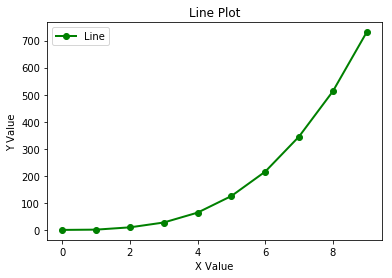

In [4]:
def line_graph(x_data, y_data, linewidth=2, color='green', marker='o'):
    """ plot line """
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.plot(x_data, y_data, color=color, marker=marker, linewidth=linewidth,
            linestyle='solid', label='Line')  # 折れ線グラフ作成

    ax.set_title('Line Plot')  # タイトルを追加
    ax.set_xlabel('X Value')  # x軸の設定
    ax.set_ylabel('Y Value')  # y軸の設定
    plt.legend(loc='upper left')  # 凡例の設定

    plt.show()

line_graph(x_data=x_data, y_data=y_data)

<a name="scatter"></a>
## 散布図

In [5]:
ALPHABET = 'abcdefghijklmnopqrstuvwxyz'

n_data = 10
x_data = np.arange(n_data)
y_data = func(x_data)
labels = list(ALPHABET[:n_data])
cmap_name = 'gist_rainbow'
cmap = plt.get_cmap(cmap_name)

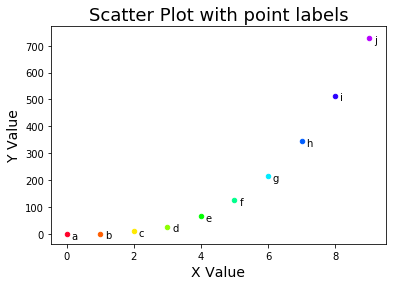

In [6]:
def scatter_graph(x_data, y_data, labels, cmap,
                  s=20, marker='o', labelfontsize=14, titlesize=18):
    """ scatter plot """
    fig = plt.figure()
    ax = fig.add_subplot(111)

    n_data = len(x_data)
    for i in range(n_data):  # データ点プロット
        ax.scatter(x_data[i], y_data[i], s=s, marker=marker, c=cmap(i/n_data))

    # 各点のラベルをプロット
    for label, friend_count, minute_count in zip(labels, x_data, y_data):
        ax.annotate(
                label,
                xy=(friend_count, minute_count),  # 各点にラベルを付加
                xytext=(5, -5),
                textcoords='offset points')
        # 文字の位置(xytext)を矢印の先からの相対距離(offset points)で指定

    ax.set_xlabel('X Value', fontsize=labelfontsize)  # x軸の設定
    ax.set_ylabel('Y Value', fontsize=labelfontsize)  # y軸の設定

    # タイトル作成
    ax.set_title('Scatter Plot with point labels', fontsize=titlesize)

    plt.show()

scatter_graph(x_data=x_data, y_data=y_data, labels=labels, cmap=cmap)

<a name="bar"></a>
## 棒グラフ

In [7]:
n_category = 5
category = ['Book %d' % i for i in range(1, n_category+1)]
reviews = np.random.randint(low=1, high=11, size=n_category)

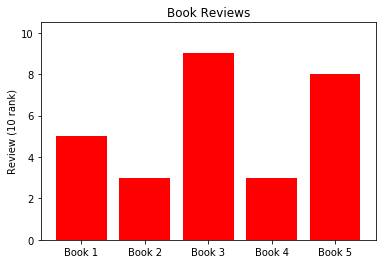

In [8]:
def bar_graph(data, labels, color='red'):
    """ 棒グラフ """
    xticks = [i for i, _ in enumerate(labels)]  # 棒グラフのx軸を作成

    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.bar(xticks, data, color=color)  # 棒グラフ作成

    ax.set_ylabel('Review (10 rank)')  # y軸の設定
    ax.set_ylim([0, 10.5])

    ax.set_title('Book Reviews')  # タイトルの追加

    ax.set_xticks(xticks)  # x軸の設定
    ax.set_xticklabels(labels)  # x軸のラベルに映画名を配置

    plt.show()

bar_graph(data=reviews, labels=category)

<a name="histogram"></a>
## ヒストグラム

In [9]:
from collections import Counter

def decile(data):
    """
    十分位変換
    """
    return (data // 10) * 10


n_students = 20
grades = np.random.randint(low=0, high=101, size=n_students)
grades_counter = Counter(decile(grades))

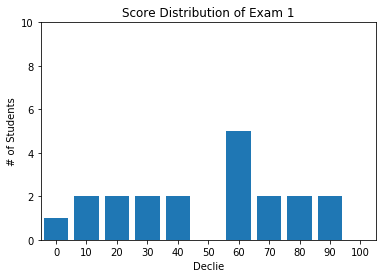

In [10]:
def histogram(counter_data):
    """ 1D histogram """
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.bar([x for x in counter_data.keys()],
           counter_data.values(), 8)  # ヒストグラム作成, 棒の幅を8にする
    ax.set_xlim([-5, 105])  # x軸の設定
    ax.set_xlabel('Declie')
    ax.set_xticks([10 * i for i in range(11)])  # x軸のラベル0, 10, ..., 100

    ax.set_ylim([0, 10])  # y軸の設定
    ax.set_ylabel('# of Students')

    ax.set_title('Score Distribution of Exam 1')  # タイトルの追加

    plt.show()

histogram(counter_data=grades_counter)

<a name="pcolormesh"></a>
## 2次元プロット

In [11]:
# 第1要素がY軸, 第2要素がX軸となることに注意
X, Y = np.meshgrid(np.linspace(0, 2, 200), np.linspace(0, 3, 300))
print('X shape:', X.shape)
print('Y shape:', Y.shape)

data = np.sin(2*np.pi*X) * (Y+1) * (3-Y)

X shape: (300, 200)
Y shape: (300, 200)


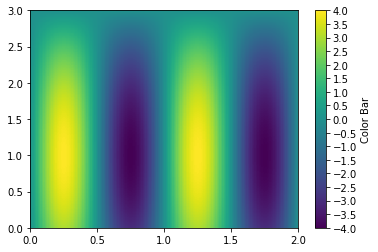

In [12]:
EPSILON = 10**(-8)

def pcolormesh(x_grid, y_grid, data, vmin, vmax, tickstep=0.5):
    """ plot 2D histogram """
    fig = plt.figure()
    ax = fig.add_subplot(111)

    quadmesh = ax.pcolormesh(x_grid, y_grid, data,
                             vmin=vmin, vmax=vmax)  # ヒートマップ作成

    cbar = fig.colorbar(quadmesh, ax=ax)  # カラーバー作成
    cbar.set_label('Color Bar')

    # x軸の設定
    xticks = np.arange(
            x_grid[0, 0],
            x_grid[0, -1]//tickstep * tickstep + EPSILON,
            tickstep)
    ax.set_xticks(xticks)

    # y軸の設定
    yticks = np.arange(
            y_grid[0, 0],
            y_grid[-1, 0]//tickstep * tickstep + EPSILON,
            tickstep)
    ax.set_yticks(yticks)

    # カラーバーの設定
    cticks = np.arange(vmin, vmax + EPSILON, tickstep)
    cbar.set_ticks(cticks)

    plt.show()

pcolormesh(x_grid=X, y_grid=Y, data=data, vmin=-4, vmax=4)

<a name="confusion_matrix"></a>
## 混合行列

In [13]:
y_true = np.array([1, 1, 2, 3, 1, 1, 2, 2, 3, 2, 1])
y_pred = np.array([1, 2, 2, 3, 2, 1, 2, 3, 3, 2, 3])
labels = [1, 2, 3]
name_labels = ['spam', 'ham', 'egg']

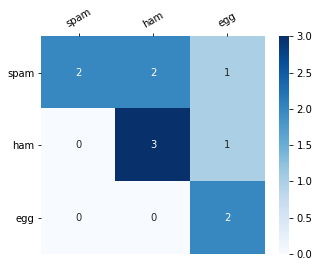

In [14]:
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix

def print_cmx(y_true, y_pred, labels, name_labels):
    """ 混同行列 """
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)  # 混合行列を作成, c_ij は真のグループが i で予測グループが j の数を表す

    df_cmx = pd.DataFrame(cmx_data, index=name_labels, columns=name_labels)  # プロット用のpd.DataFrame型

    plt.figure(figsize=(5, 4))
    ax = sn.heatmap(df_cmx, annot=True, fmt='d', cmap='Blues')
    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

    ax.set_xticklabels(name_labels, rotation=30, ha='center')  # ラベルの再設定
    ax.set_yticklabels(name_labels, rotation=0)
    plt.show()
    return ax

ax = print_cmx(y_true=y_true, y_pred=y_pred, labels=labels, name_labels=name_labels)

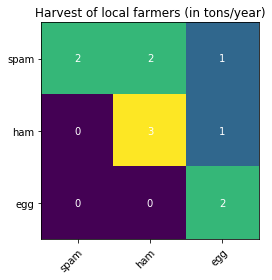

In [15]:
def plot_confusion_matrix(y_true, y_pred, labels,  name_labels):
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)  # 混合行列を作成, c_ij は真のグループが i で予測グループが j の数を表す

    df_cmx = pd.DataFrame(cmx_data, index=name_labels, columns=name_labels)  # プロット用のpd.DataFrame型

    fig, ax = plt.subplots()
    im = ax.imshow(cmx_data)

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(name_labels)))
    ax.set_yticks(np.arange(len(name_labels)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(name_labels)
    ax.set_yticklabels(name_labels)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(name_labels)):
        for j in range(len(name_labels)):
            text = ax.text(j, i, cmx_data[i, j],
                           ha="center", va="center", color="w")

    ax.set_title("Harvest of local farmers (in tons/year)")
    fig.tight_layout()
    plt.show()

plot_confusion_matrix(y_true=y_true, y_pred=y_pred, labels=labels, name_labels=name_labels)

### [トップへ](#top)